In [13]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
# Define the path to your dataset folder
image_folder = '/Users/shaneab/Projects/Machine Learning/Expression recognition/jonathanheix dataset/images'

# Initialize lists to store image data and labels
X = []
y = []

# Iterate through the folder structure
for subdir, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(subdir, file)
            label = os.path.basename(subdir)
            
            # Load and preprocess the image
            image = Image.open(img_path).convert('L')
            image = image.resize((48, 48))
            X.append(np.array(image).flatten())
            y.append(label)

In [15]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [16]:
# Normalize image data
X = X / 255.0  # Normalize pixel values to [0, 1]

In [17]:
# Encode labels as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.76392211,  0.82846479,  0.86606039, ..., -0.82241751,
        -0.85152931, -0.95769143],
       [ 1.47952322,  1.68070712,  1.75683258, ...,  1.75764734,
         1.60611062,  1.60686105],
       [-0.0608385 ,  0.11208718,  0.10074906, ...,  1.29323567,
         1.22210438,  1.22598692],
       ...,
       [-0.37618814, -1.01188459, -0.87784574, ..., -0.26770357,
        -0.30112037, -0.33559701],
       [-1.00688743, -0.91307388, -0.91548401, ...,  1.21583372,
         0.63329481,  1.07363726],
       [ 1.54016738,  1.63130177,  1.63137171, ...,  0.63531913,
         0.65889523,  1.30216174]])

In [19]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Grid Search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_model.fit(X_train, y_train)
print("Best Parameters:", knn_model.best_params_)

In [20]:
# Make Prediciton
best_knn = knn_model.best_estimator_
best_knn
y_pred = best_knn.predict(X_test)
y_pred

array([6, 4, 2, ..., 6, 4, 5])

In [23]:
# Evaluate the model
print("Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
Accuracy: 0.8786485545106235
              precision    recall  f1-score   support

       angry       0.90      0.85      0.87      2001
     disgust       0.83      0.92      0.87       231
        fear       0.87      0.87      0.87      2068
       happy       0.90      0.87      0.88      3578
     neutral       0.81      0.90      0.86      2441
         sad       0.89      0.86      0.87      2429
    surprise       0.93      0.94      0.93      1607

    accuracy                           0.88     14355
   macro avg       0.88      0.89      0.88     14355
weighted avg       0.88      0.88      0.88     14355

Accuracy: 0.88


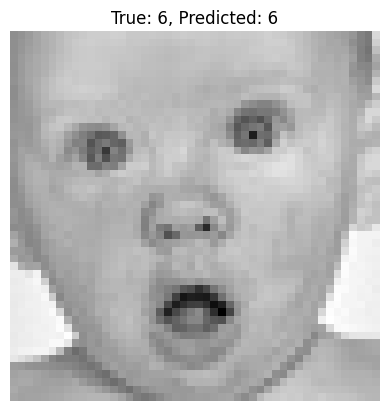

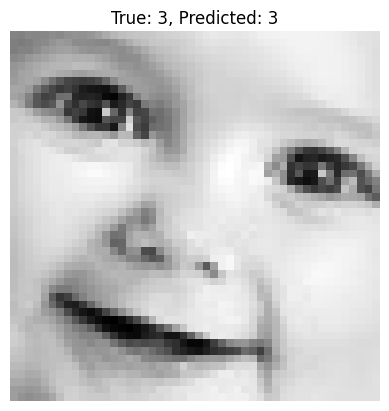

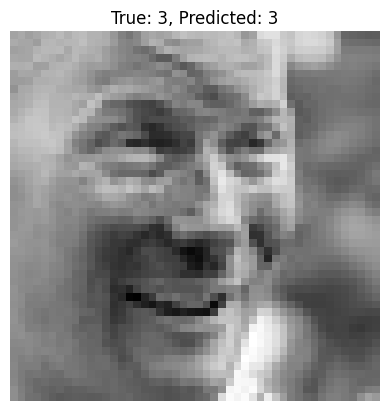

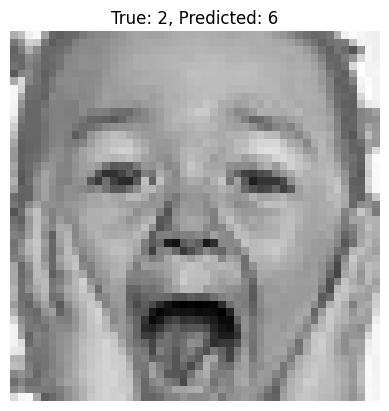

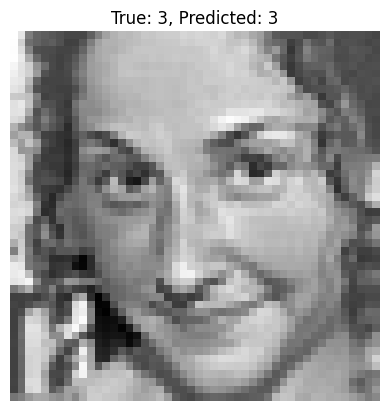

In [22]:
# Visualize random predictions
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    image = X_test[idx].reshape(48, 48)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()